In [17]:
##Predict if patients are susceptible in going through REM sleep

In [18]:
# import file

import csv

file_path = "datasets\\data2.csv"

with open(file_path, 'r') as csv_file:
    reader = csv.reader(csv_file)

In [19]:
# import packages

import datetime
import os
import collections

import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import (accuracy_score, auc, classification_report,
                             confusion_matrix, f1_score, precision_recall_curve,
                             precision_score, recall_score, roc_auc_score,
                             roc_curve)
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import (cross_validate, train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [20]:
dataset_file = file_path
df = pd.read_csv(dataset_file)
df.shape

(452, 13)

In [21]:
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,0,65,1,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
1,1,69,0,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0
2,2,40,1,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,3,40,1,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0
4,4,57,0,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,447,27,1,7.5,0.91,22,57,21,0.0,0.0,0.0,0,5.0
448,448,52,0,6.0,0.74,28,57,15,4.0,25.0,0.0,0,3.0
449,449,40,1,8.5,0.55,20,32,48,1.0,0.0,3.0,1,0.0
450,450,45,0,7.0,0.76,18,72,10,3.0,0.0,0.0,0,3.0


In [22]:
# features extracted for the models

X_df = df.drop(['Unnamed: 0', 'Age', 'Gender', 'Light sleep percentage', 'Deep sleep percentage'], axis = 1)
y_df = df['REM sleep percentage']

In [23]:
# splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 50)

In [24]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

X_train_resampled, X_test, y_train_resampled, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 50)

In [25]:
X_train_resampled.shape, X_test.shape

((748, 8), (188, 8))

In [26]:
Counter(y_train), Counter(y_test)

(Counter({20: 72,
          28: 49,
          22: 49,
          23: 47,
          18: 39,
          25: 27,
          24: 22,
          27: 20,
          26: 12,
          15: 10,
          30: 7,
          19: 6,
          21: 1}),
 Counter({25: 19,
          24: 19,
          21: 17,
          28: 16,
          19: 16,
          15: 15,
          20: 15,
          27: 13,
          22: 13,
          23: 12,
          26: 12,
          30: 12,
          18: 9}))

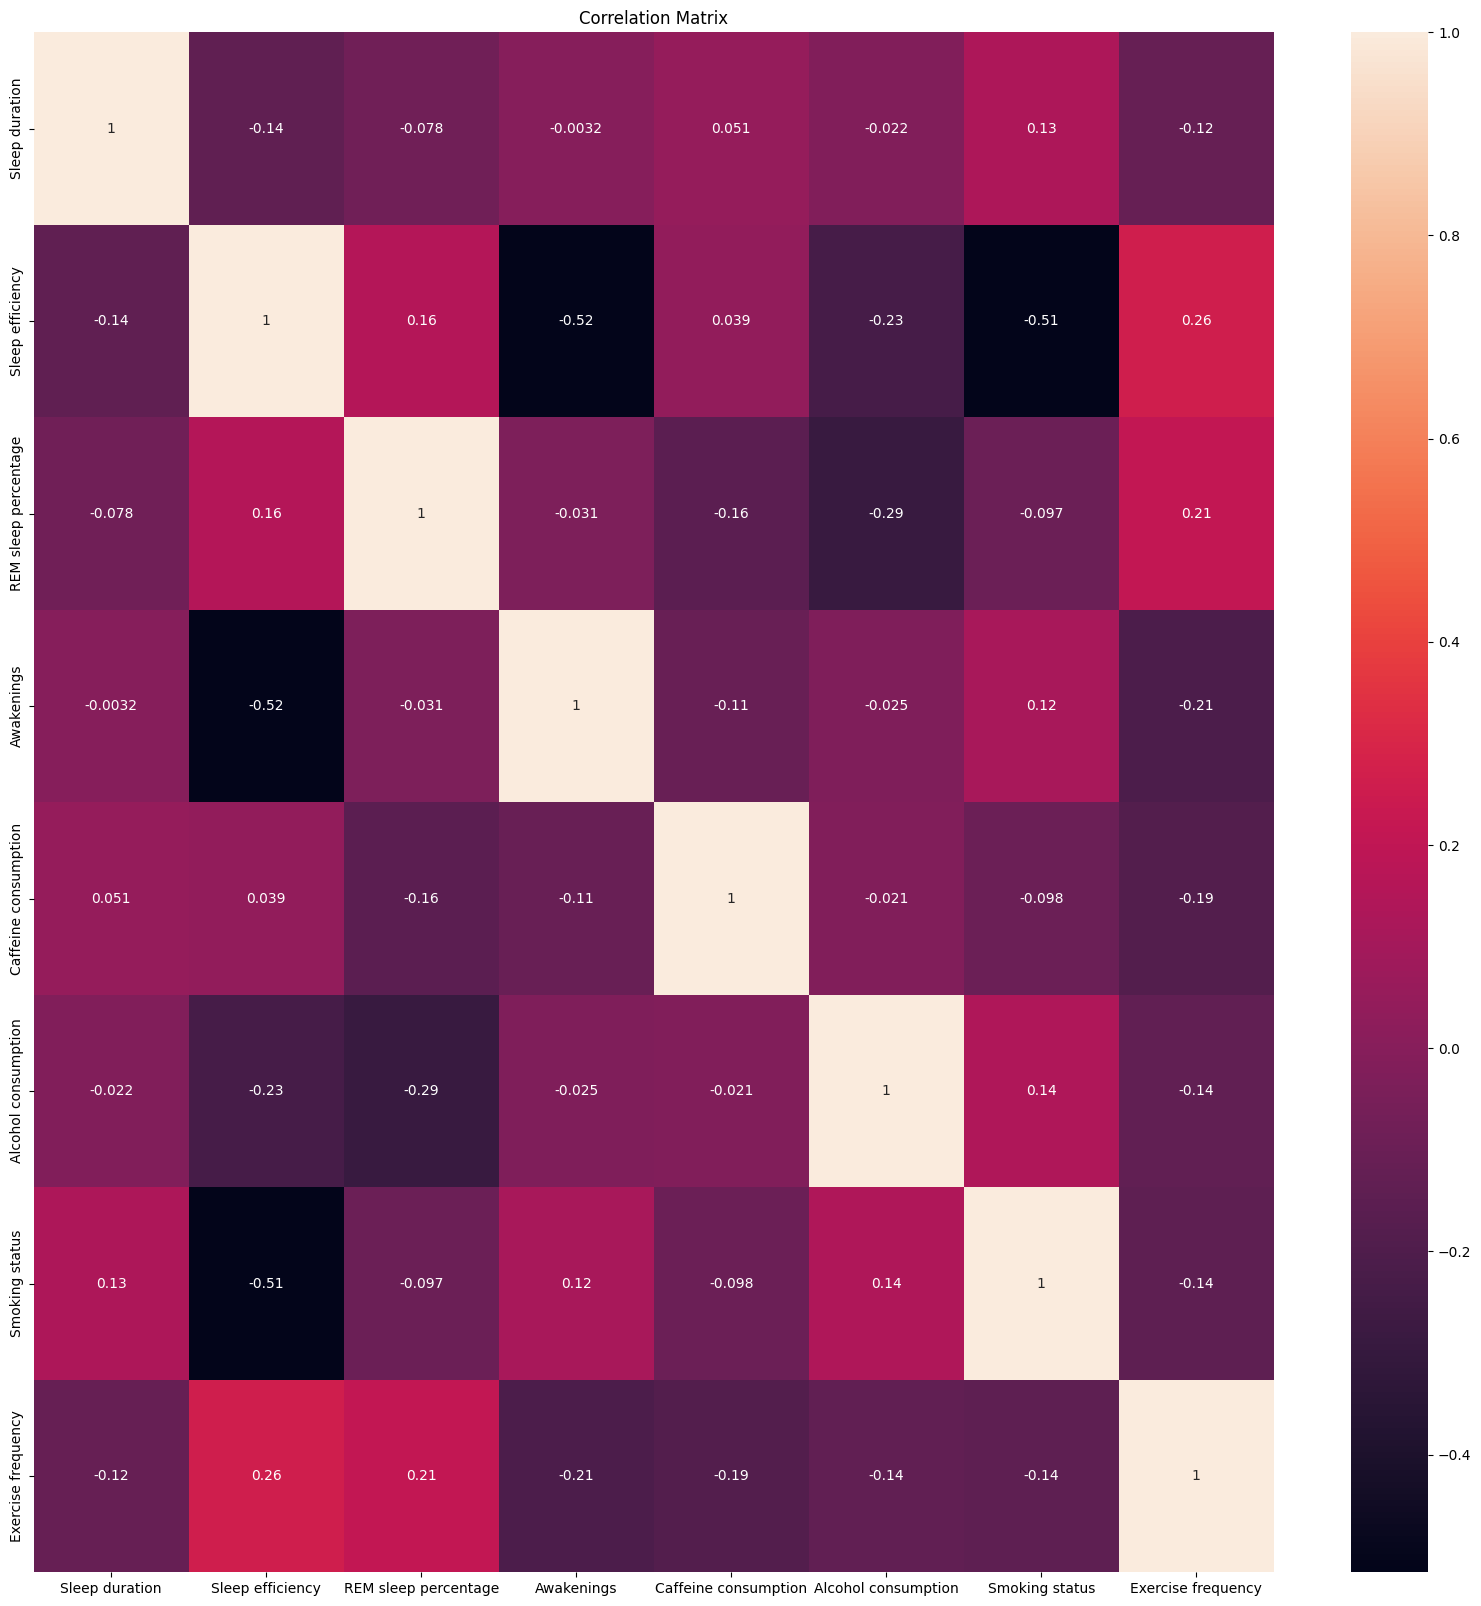

In [27]:
# performing a correlation matrix

corr_matrix = X_test.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [28]:
# logistic regression

lr_model = LogisticRegression(max_iter = 5000)
lr_model.fit(X_train_resampled, y_train_resampled)

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

In [29]:
y_pred = lr_model.predict(X_test)

accuracy = lr_model.score(X_test, y_test)
print('Logistic Regression Accuracy:', accuracy)

Logistic Regression Accuracy: 0.925531914893617


In [30]:
report = classification_report(y_test, y_pred)

print("Logistic Regression Classification Report")
print(report)

Logistic Regression Classification Report
              precision    recall  f1-score   support

          15       1.00      1.00      1.00        15
          18       1.00      1.00      1.00         9
          19       1.00      1.00      1.00        16
          20       1.00      1.00      1.00        15
          21       1.00      1.00      1.00        17
          22       1.00      0.92      0.96        13
          23       0.82      0.75      0.78        12
          24       0.83      0.79      0.81        19
          25       0.81      0.89      0.85        19
          26       0.83      0.83      0.83        12
          27       0.81      1.00      0.90        13
          28       1.00      0.88      0.93        16
          30       1.00      1.00      1.00        12

    accuracy                           0.93       188
   macro avg       0.93      0.93      0.93       188
weighted avg       0.93      0.93      0.93       188



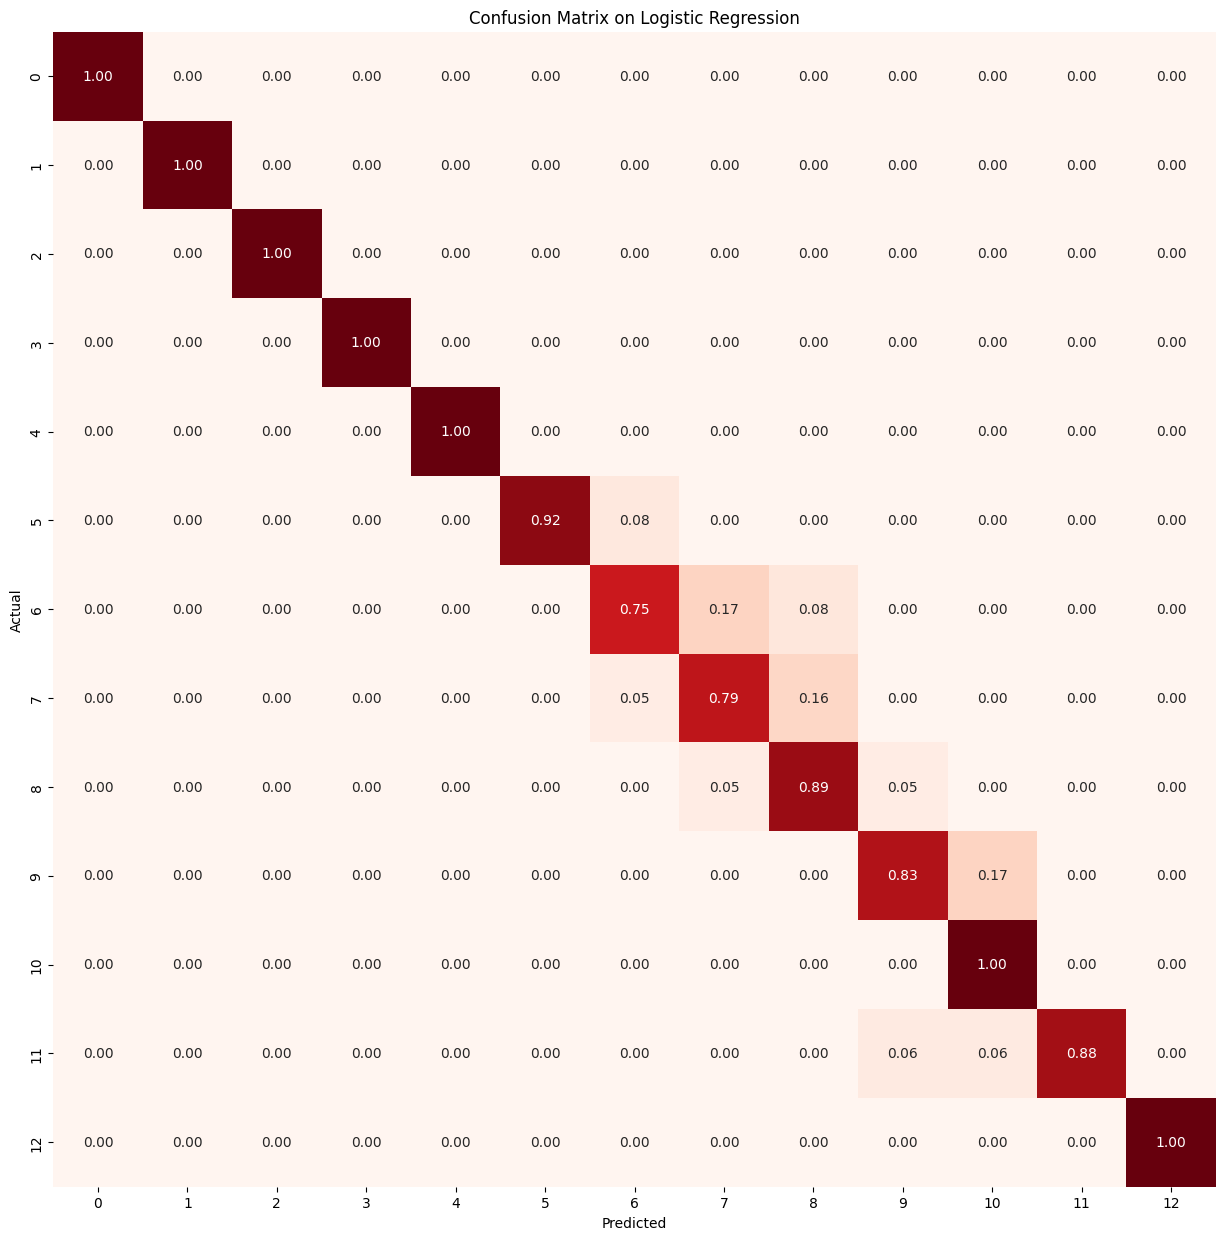

In [31]:
# confusion matrix on logistic regression

def plot_confusion_matrix(cm, show_absolute = True, show_normed = False, cmap = 'Reds'):
    plt.figure(figsize = (15, 15))

    if show_normed:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    sns.heatmap(cm, annot = True, fmt = '.2f' if show_normed else 'd', cmap = cmap, cbar = False)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix on Logistic Regression')

    plt.show()

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, show_absolute = True, show_normed = True, cmap = 'Reds')

In [32]:
# k-nearest Neighbors

knn = KNeighborsClassifier()

knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [33]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("K-Nearest Neighbors Accuracy:", accuracy)

K-Nearest Neighbors Accuracy: 0.8776595744680851


In [34]:
report = classification_report(y_test, y_pred)

print("K-Nearest Neighbors Classification Report")
print(report)

K-Nearest Neighbors Classification Report
              precision    recall  f1-score   support

          15       0.93      0.93      0.93        15
          18       0.69      1.00      0.82         9
          19       0.84      1.00      0.91        16
          20       1.00      0.53      0.70        15
          21       1.00      1.00      1.00        17
          22       0.69      0.85      0.76        13
          23       1.00      0.58      0.74        12
          24       0.79      0.79      0.79        19
          25       0.86      1.00      0.93        19
          26       0.91      0.83      0.87        12
          27       1.00      1.00      1.00        13
          28       0.88      0.88      0.88        16
          30       1.00      1.00      1.00        12

    accuracy                           0.88       188
   macro avg       0.89      0.88      0.87       188
weighted avg       0.89      0.88      0.87       188



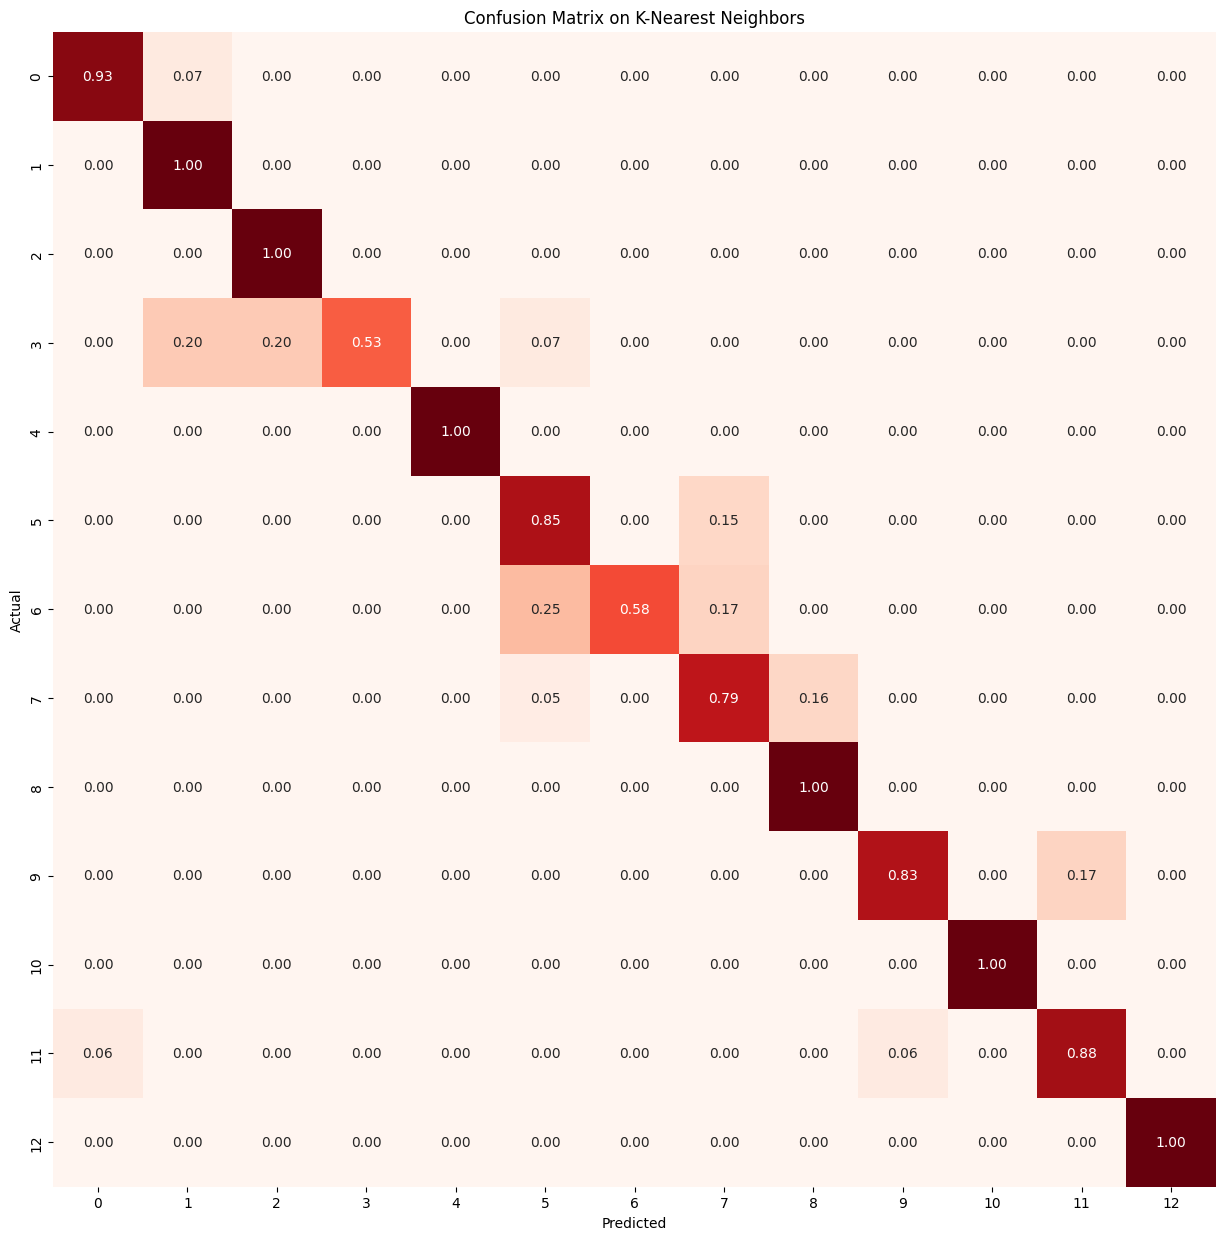

In [35]:
# confusion matrix on k-nearest neighbors

def plot_confusion_matrix(cm, show_absolute = True, show_normed = False, cmap = 'Reds'):
    plt.figure(figsize = (15, 15))

    if show_normed:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    sns.heatmap(cm, annot = True, fmt = '.2f' if show_normed else 'd', cmap = cmap, cbar = False)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix on K-Nearest Neighbors')

    plt.show()

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, show_absolute = True, show_normed = True, cmap = 'Reds')

In [36]:
# cross validation on k-nearest neighbors using stratified k-folds

knn = KNeighborsClassifier()

num_folds = 5

stratified_kfold = StratifiedKFold(n_splits = num_folds, shuffle = True, random_state = 50)

accuracy_scores = []

X_train_resampled = X_train_resampled.values if isinstance(X_train_resampled, pd.DataFrame) else X_train_resampled
y_train_resampled = y_train_resampled.values if isinstance(y_train_resampled, pd.Series) else y_train_resampled

for train_index, test_index in stratified_kfold.split(X_train_resampled, y_train_resampled):
    X_train_fold, X_test_fold = X_train_resampled[train_index], X_train_resampled[test_index]
    y_train_fold, y_test_fold = y_train_resampled[train_index], y_train_resampled[test_index]

    knn.fit(X_train_fold, y_train_fold)

    y_pred_fold = knn.predict(X_test_fold)

    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    accuracy_scores.append(accuracy_fold)

mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print('Cross Validation on K-Nearest Neighbors')
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

Cross Validation on K-Nearest Neighbors
Mean Accuracy: 0.8516
Standard Deviation of Accuracy: 0.0394


In [37]:
# random forest

rfc = RandomForestClassifier(n_estimators = 50, random_state = 25)
rfc.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=50, random_state=25)

In [38]:
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Random Forest Accuracy:', accuracy)

Random Forest Accuracy: 0.9680851063829787


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [39]:
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred))

Random Forest Classification Report
              precision    recall  f1-score   support

          15       1.00      1.00      1.00        15
          18       1.00      1.00      1.00         9
          19       0.94      1.00      0.97        16
          20       0.93      0.93      0.93        15
          21       1.00      1.00      1.00        17
          22       0.92      0.92      0.92        13
          23       1.00      0.92      0.96        12
          24       1.00      0.84      0.91        19
          25       0.86      1.00      0.93        19
          26       1.00      1.00      1.00        12
          27       1.00      1.00      1.00        13
          28       1.00      1.00      1.00        16
          30       1.00      1.00      1.00        12

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



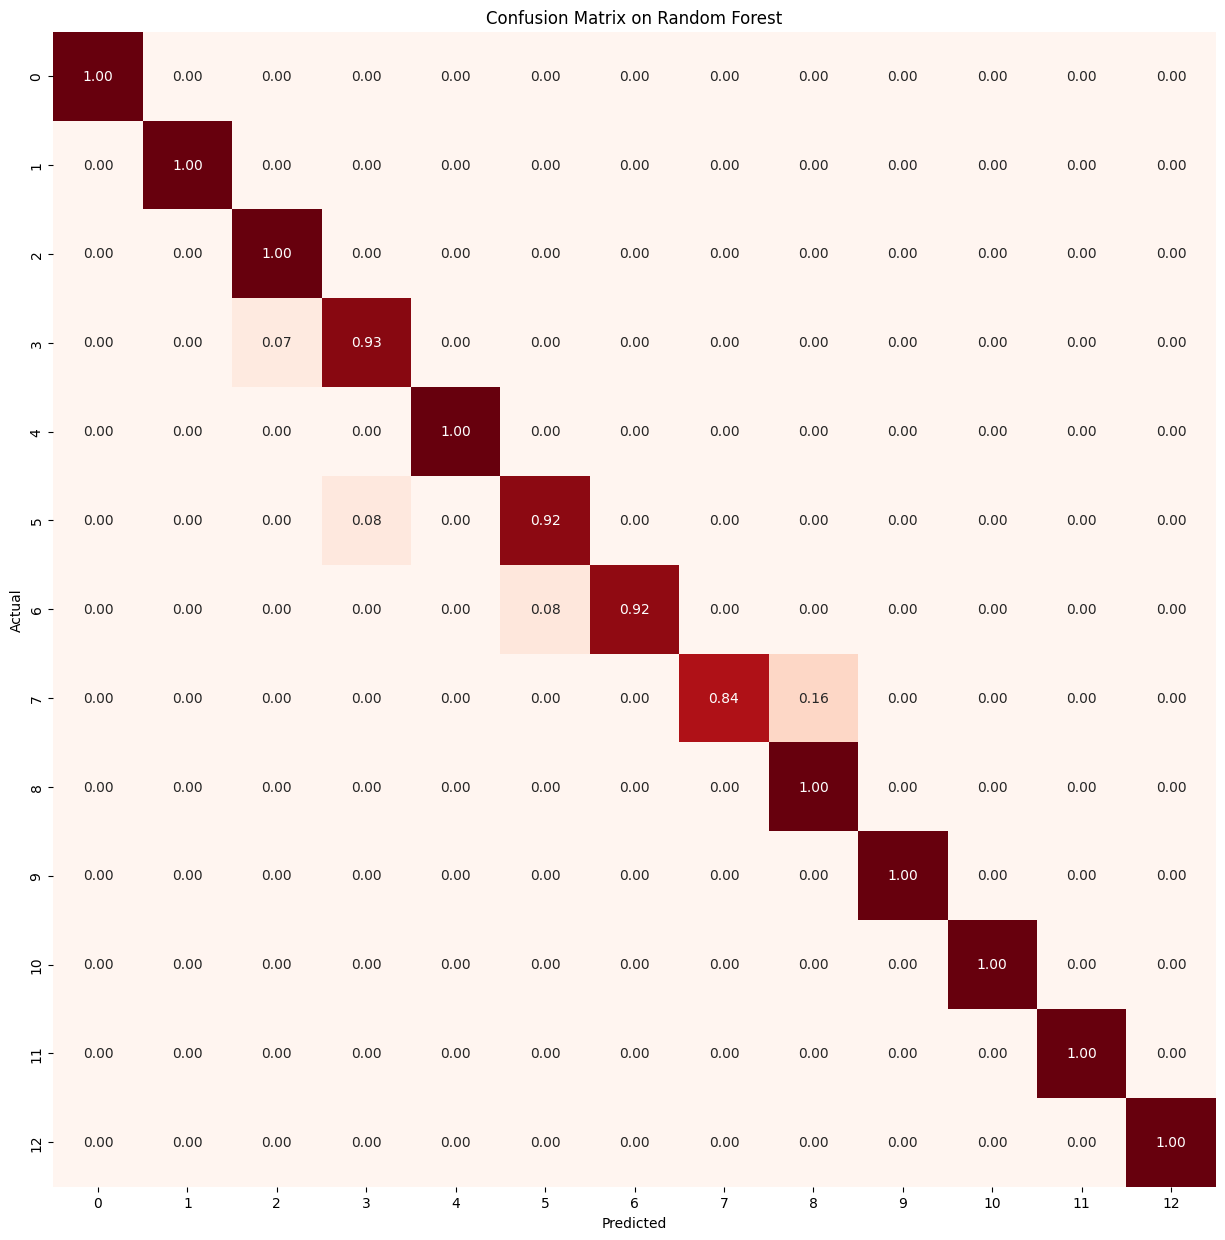

In [40]:
# confusion matrix on random forest

def plot_confusion_matrix(cm, show_absolute = True, show_normed = False, cmap = 'Reds'):
    plt.figure(figsize = (15, 15))

    if show_normed:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    sns.heatmap(cm, annot = True, fmt = '.2f' if show_normed else 'd', cmap = cmap, cbar = False)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix on Random Forest')

    plt.show()

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, show_absolute = True, show_normed = True, cmap = 'Reds')